In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')
import seaborn as sns

# Creating a data

In [2]:
X = np.array([[2.5, 2.1],[2, 0.8],[3.3, 2.9],[7, 6.1]])
X

array([[2.5, 2.1],
       [2. , 0.8],
       [3.3, 2.9],
       [7. , 6.1]])

# Visualizing the data

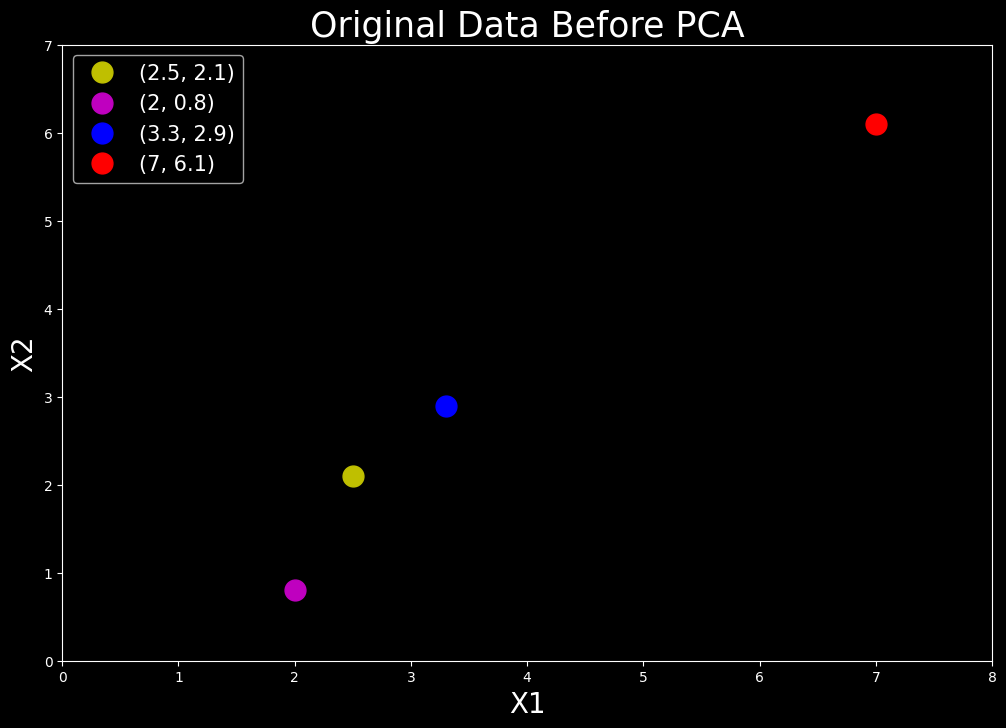

In [3]:
plt.figure(figsize = (12,8))
plt.plot(X[0,0], X[0,1],'yo',markersize =15, label = '(2.5, 2.1)' )
plt.plot(X[1,0], X[1,1],'mo',markersize =15, label = '(2, 0.8)' )
plt.plot(X[2,0], X[2,1],'bo',markersize =15, label = '(3.3, 2.9)' )
plt.plot(X[3,0], X[3,1],'ro',markersize =15, label = '(7, 6.1)' )
plt.xlim([0,8])
plt.ylim([0,7])
plt.xlabel('X1',fontsize = 20)
plt.ylabel('X2',fontsize = 20)
plt.title('Original Data Before PCA',fontsize = 25)
plt.legend(fontsize = 15)
plt.show()

# Standardizing the data

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.61197414, -0.44787218],
       [-0.86696337, -1.11328227],
       [-0.20399138, -0.03838904],
       [ 1.6829289 ,  1.59954349]])

# Calculating the covariance matrix

In [7]:
cov_mat = np.cov(X_scaled, rowvar=False)
cov_mat

array([[1.33333333, 1.31300338],
       [1.31300338, 1.33333333]])

# Finding Eigen Values and Eigen Vectors

In [8]:
# Get Eigen Vectors and Eigen Values
eigen_values, eigen_vectors = np.linalg.eig(cov_mat)
print(eigen_values)
print(" ")
print(" ")
print(eigen_vectors)

[0.02032995 2.64633671]
 
 
[[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]


In [9]:
large_eigvec = eigen_vectors[:,1:]
large_eigvec

array([[-0.70710678],
       [-0.70710678]])

# Projecting original data to new feature space

In [10]:
print(large_eigvec.T.shape)
print(" ")
print(X_scaled.T.shape)

(1, 2)
 
(2, 4)


In [11]:
Feat_vec = np.matmul(large_eigvec.T, X_scaled.T)

In [12]:
Feat_vec

array([[ 0.74942452,  1.40024512,  0.17138884, -2.32105849]])

In [14]:
print(Feat_vec.shape)

(1, 4)


In [15]:
print(Feat_vec.shape)

(1, 4)


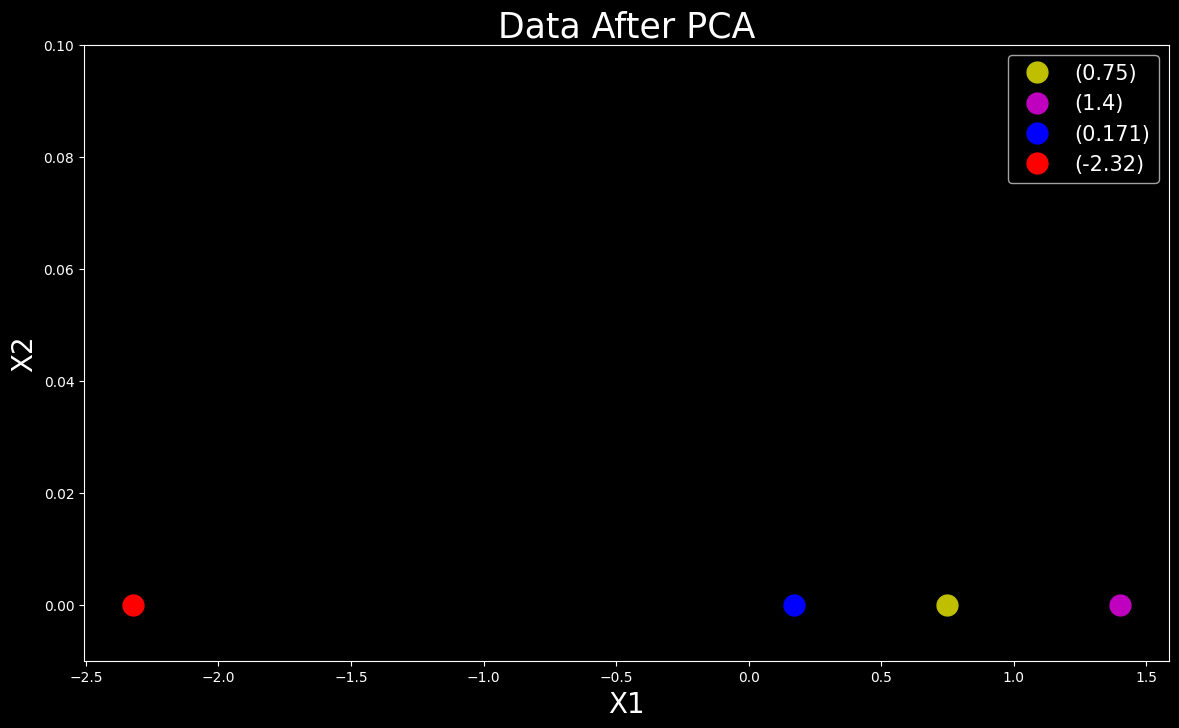

In [16]:
plt.figure(figsize = (14,8))
plt.plot(Feat_vec[0,0],0,'yo',markersize =15, label = '(0.75)' )
plt.plot(Feat_vec[0,1],0,'mo',markersize =15, label = '(1.4)' )
plt.plot(Feat_vec[0,2],0,'bo',markersize =15, label = '(0.171)' )
plt.plot(Feat_vec[0,3],0,'ro',markersize =15, label = '(-2.32)' )
#plt.xlim([-0.065,0.065])
#plt.plot([-0.07,0.07],[0,0],'g',lw = 3)
plt.ylim([-0.01,0.1])
#plt.plot([0,0],[-0.7,0.7],'g', lw = 3)
plt.xlabel('X1',fontsize = 20)
plt.ylabel('X2',fontsize = 20)
plt.title('Data After PCA',fontsize = 25)
plt.legend(fontsize = 15)
plt.show()

# Using Sklearn

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 1)
X_pca = pca.fit_transform(X_scaled)
X_pca

array([[-0.74942452],
       [-1.40024512],
       [-0.17138884],
       [ 2.32105849]])

In [18]:
X_scaled

array([[-0.61197414, -0.44787218],
       [-0.86696337, -1.11328227],
       [-0.20399138, -0.03838904],
       [ 1.6829289 ,  1.59954349]])

In [19]:
print(pca.explained_variance_ratio_)

[0.99237627]
